# NBE-E4260 Genesis and Analysis of Brain Signals 2023
Matias Palva, Vladislav Myrov, Joonas Juvonen, Joona Repo, Merlin Dumeur

# Exercise A, deadline on Wednesday 1.02.2023 23:59 AM

# Outline
During parts 1-3, you will create a simulated oscillatory time series.
 1. Simulate white noise and create times array
 2. Visualize the simulated white noise
 3. Simulate oscillatory brain signal with the help of wavelets.

The parts 4-6 will focus on analyzing the data and creating the output figures.

 4. Power spectrum density
 5. Wavelet transform and visualization for simulated data
 6. Clean the figure
 
Save the figures from Tasks 4-6 and return it to MyCourses as a part of your exercise report pdf. The quarterly exam questions will also be visible in the end of this Jupyter notebook. The answers should be included in the exercise report pdf. 

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy.random import normal
from scipy import signal, stats

### 1. Simulate white noise and create times array

First we will create simulated white noise for $60$ seconds with sampling frequency $f_{s} = 500 Hz$. For creating the white noise, use numpy.random.normal with size of the array as parameter. Other parameters can be kept default. Also create an array containing all the time samples of the data. This will later be used when plotting the signal.

Helpful functions: 
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
- https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [11]:
fs = 500 # Sampling frequency
length = 60 # Time in seconds

# YOUR CODE HERE
samples = fs * length
wh = np.random.normal(size = samples)
time = np.linspace(0, 60, samples)

### 2. Visualize the simulated white noise

Now that we have some signal, let's see what it looks like. Create figure and axes objects, plot the simulated timeseries. Remember to label your axes properly and add a title.

Helpful functions: 
- https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html
- https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.plot.html
- https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html

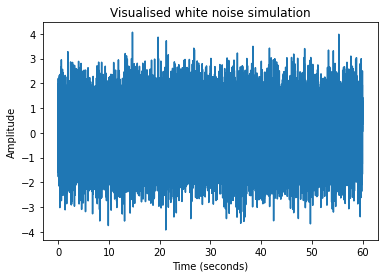

In [12]:
# YOUR CODE HERE
fig, ax = plt.subplots()
ax.plot(time, wh)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amplitude')
ax.set_title('Visualised white noise simulation')
plt.show()

### 3. Simulate data with wavelet filtering white noise

White noise alone is not very interesting. Let's simulate brain activity with the help of wavelets. Compute a wavelet transform for the simulated white noise at $10 Hz$, with Morlet parameter $w=7$. You need to also define the widths parameter of the cwt function, see the documentation below for help and tutorials. After that, sum the real part of the obtained wavelet transform to the original white noise data.

Steps:

a. Make a copy of the original white noise.

b. Do a wavelet transform with the given parameters and functions.

c. Take the Real part of the result from b. and add it to a.

d. Think about why this works


Helpful functions:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.morlet2.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cwt.html


In [13]:
freq = 10
w = 7

# YOUR CODE HERE
wh_copy = wh
width = (w*fs) / (2*freq*np.pi)
cwt = signal.cwt(wh_copy, wavelet=signal.morlet2, widths=[width], w=w)
result = cwt.real + wh_copy

### 4. Power spectrum density

Now that we have something interesting, let's visualize it. Compute PSD for the simulated brain signal using Welch's method and visualize it. Label your axes and add a title.

Helpful functions:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.loglog.html

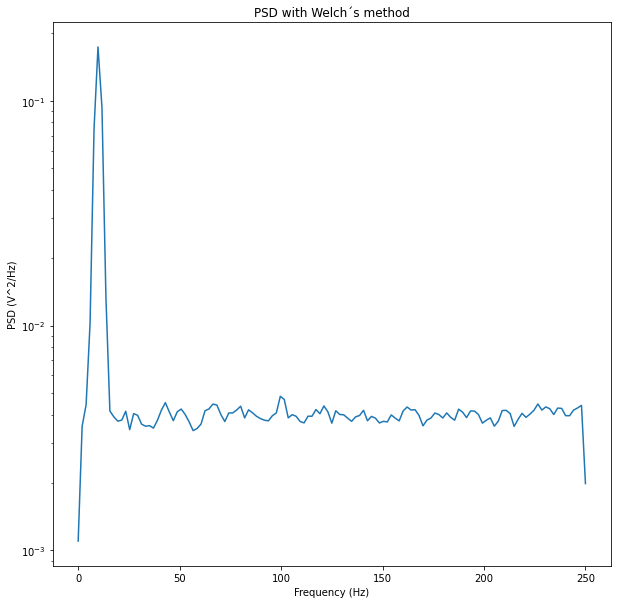

In [14]:
# YOUR CODE HERE
sample_freq, psd = signal.welch(result, fs=fs)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(sample_freq, np.transpose(psd))
ax.set_yscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('PSD (V^2/Hz)')
ax.set_title('PSD with Welch´s method')
plt.show()

### 5. Wavelet transform and visualization for simulated data

As discussed during lecture 2, the power spectrum density lacks time information. With brain signals, we are also interested on the timing of the oscillations. Wavelets allow us to see the changes in the e.g., amplitude of different frequencies. Compute the wavelet transform for the simulated brain data (white noise + real part of wavelet transformed white noise, obtained in Task 3) for given parameters and visualize it properly. Split the wavelet transform and visualization to different code blocks. The cwt function takes 1D-array as an input, thus you need to squeeze out the extra dimension or make indice slicing (see what sim_data.shape prints out for clarification).

Helpful functions:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.morlet2.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cwt.html
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html
- https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.imshow.html
- https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html

In [15]:
w = 7
freqs = np.geomspace(1, 20, 50) # logarithmically spaced frequencies

(50, 30000)


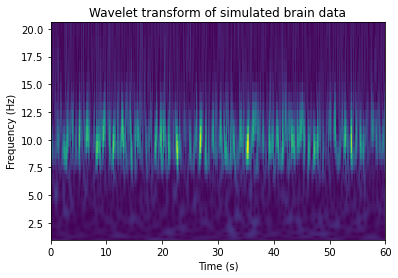

In [39]:
# YOUR CODE HERE
width = (w*fs) / (2*freqs*np.pi)
result_squeezed = np.squeeze(result, axis=0)
cwt_result = np.abs(signal.cwt(result_squeezed, wavelet=signal.morlet2, widths=width, w=w))
fig, ax = plt.subplots()
ax.pcolormesh(time, freqs, cwt_result)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Wavelet transform of simulated brain data')
plt.show()

### 6. Clean the figure

Your previously obtained time-frequency representation should include an oscillatory component and noise. There are various statistical approaches for highlighting significant data and it depends on the research question and the hypothesis. In this exercise we do not have a contrast (e.g. data from two different conditions) that statistical tests typically require. Instead, we will use a max statistic approach to derive a distribution that can be used to obtain a percentile that highlights the most significant findings.

Use the simulated oscillatory signal obtained from Task 5. Take the maximum value across frequencies and compute a 99th percentile across time to obtain a significance threshold for noise. Use this threshold to create a significance mask by comparing elements of the findings to the significance threshold. In the mask, everything above the threshold is set to True, otherwise False. Save the mask to a variable called sign_mask.

Rest of the code for visualization is already provided. Notice, that we are now only plotting a 10 second segment of the signal in order to highlight the short lifespan of the oscillations. Insert the figure to the exercise report.

Helpful functions:
- https://numpy.org/doc/stable/reference/generated/numpy.percentile.html
- https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html
- https://numpy.org/doc/stable/reference/generated/numpy.greater.html (see the shorthand notation >)

In [50]:
# YOUR CODE HERE
t = time
# First we take wavelet transform of white noise.
cwtm_wh = signal.cwt(wh, wavelet=signal.morlet2, widths=width, w=w)
cwtm = np.abs(cwtm_wh)
# Then taking maximum values across frequencies.
max_val = np.ndarray.max(cwtm, axis = 0)
# Calculating the significance threshold (99th percentile).
noise_threshold = np.percentile(max_val, q = 99)
#Saving mask to "sign_mask".
sign_mask = cwt_result > noise_threshold

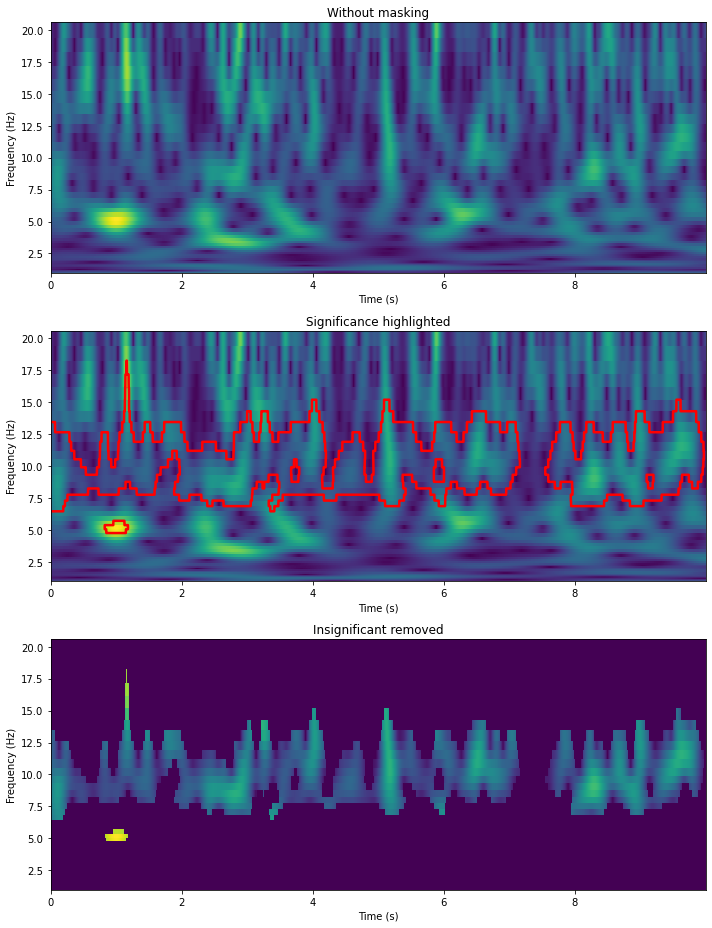

In [51]:
fig, axes = plt.subplots(3, figsize=(10, 13))

axes[0].pcolormesh(t[:5000], freqs, np.abs(cwtm)[:,:5000], shading='nearest')
axes[0].set_title("Without masking")

axes[1].pcolormesh(t[:5000], freqs, np.abs(cwtm)[:,:5000], shading='nearest')
axes[1].contour(t[:5000], freqs, sign_mask[:,:5000], colors=['r'],
                levels=[0.5], linewidths=2.5)
axes[1].set_title("Significance highlighted")

cwtm_masked = np.ma.array(np.abs(cwtm[:,:5000]),
                          mask=np.invert(sign_mask[:,:5000]),
                          fill_value=0).filled()
axes[2].pcolormesh(t[:5000], freqs, cwtm_masked)
axes[2].set_title("Insignificant removed")

for ax in axes:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    
fig.tight_layout()

fig.savefig("sim_data_tfr.png")

### Quarterly exam questions
Include an answer to the glossary and the two essays in your exercise A report. 

#### Glossary (15 points)
Explain these terms accurately.

1. Construct
2. Operationalization
3. Mechanism
4. Magnetoencephalography
5. Power spectrum
6. Phase synchron
7. Communication through coherence
8. PING model
9. Time-frequency uncertainty

#### Essay 1 (15 points)
Please provide well-structured essay answers to these questions. In particular, make sure that each sentence has the subject, predicate, and object and that these three together make sense (!). The expected length is approx. 2 A4 pages for the whole essay (excluding figures and equations). 

A.  Describe a "neuronal oscillation" phenomenologically and give an example of a set of neuronal synaptic mechanisms and microcircuit structures that give rise to oscillations. 

B.  Describe then the physiological functional consequences of oscillations and their phase relationships (phase synchrony), including "communication through coherence".

C.  How would you (i) implement a phase synchronization analysis, (ii) assess its statistical significance, and (iii) interpret the results in terms of physiology and functional relevance (think about experimental design and behavioral correlates)?

#### Essay 2 (15 points)
Expected length approx. 2 A4 pages for the whole essay (excluding figures and equations). 

A. 	Describe the analytical operationalization of neuronal oscillations with power spectral and wavelet-based methods. 
B. 	Which advantages and disadvantages these approaches offer and why? 
C. 	Describe the steps in the estimation of phase synchrony and assess its differences from coherence and phase coherence (from perspectives of mathematics and interpretational value of the outcomes).